# CKD Subtypes Analysis
We will try in this notebook to find potential CKD subtypes with clustering method.

In [32]:
# Global Tools
import json
import os

# Math / Data Manipulation
import numpy as np
import pandas as pd
from scipy.io import arff

# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [33]:
with open('../config.json', 'r') as f:
  config = json.load(f)
  
ROOT = os.path.dirname(os.path.abspath(os.path.curdir))

In [34]:
path_to_dataset_file = os.path.join(ROOT, config['dataset_dir'], config['dataset_file'])

data = arff.loadarff(path_to_dataset_file) # Work with advices found here : https://stackoverflow.com/questions/62653514/open-an-arff-file-with-scipy-io
df = pd.DataFrame(data[0])

print(f"Dataset Shape : {df.shape}")
df.head()


Dataset Shape : (400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


In [35]:
# Rename column names to make it more understandable
path_to_info_file = os.path.join(ROOT, config['dataset_dir'], config['dataset_info_file'])
with open(path_to_info_file) as info_file:
    columns_and_desc = info_file.readlines()[31:56]
columns_names = map(lambda s : s.split('-')[1].strip().replace(' ', '_'), columns_and_desc)

df.columns = columns_names

# Decode byte to utf8
str_df = df.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

# Drop empty values
df = df.dropna()
    
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
5,60.0,90.0,1.015,3,0,?,?,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
9,53.0,90.0,1.020,2,0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3,0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
12,68.0,70.0,1.015,3,1,?,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,ckd


In [36]:
target_col = config.get("target_col")
X = df[df.columns.difference([target_col])]

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
X = pd.get_dummies(X, columns=categorical_cols)


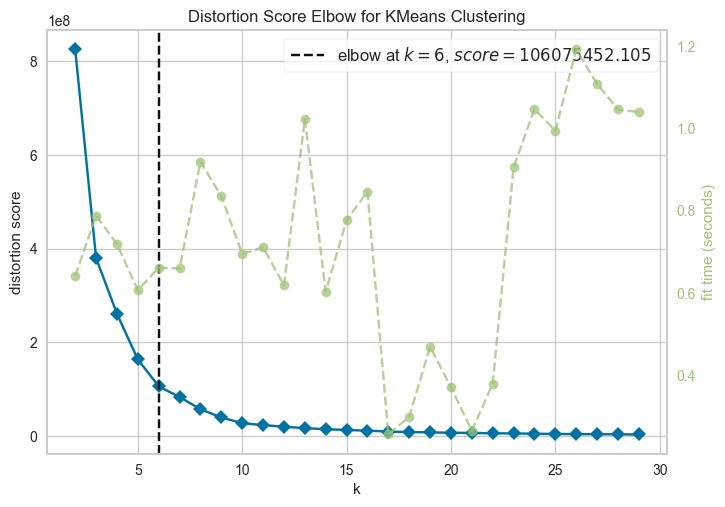

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Elbow Method for K means

model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(X)
visualizer.show()

This Graph show that there is 6 possible clusters for CKD according to the Elbow Method.
This Suggest that there is 6 differents potential CKD subtypes from the provided informations.